In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
runvars = pd.read_csv('../../data/tmp/funcchar/leadvar_list_withLD_R2_0.5_20221010.tsv', sep='\t')
runvars.index = runvars['ID']
runvars = runvars.drop('ID', axis=1)
runvars.head()

,CHR,POS,REF,ALT,Leadvar_ID,R2,Cohort,Pheno,Leadvar_P,Peak
ID,,,,,,,,,,
"1:48106017[b37]A,T",1,48106017,A,T,"1:48106017[b37]A,T",1.000000,SL,Susceptibility,5.845959e-08,1
"1:48106976[b37]C,T",1,48106976,C,T,"1:48106017[b37]A,T",0.864715,SL,Susceptibility,5.845959e-08,1
"1:48107729[b37]C,T",1,48107729,C,T,"1:48106017[b37]A,T",1.000000,SL,Susceptibility,5.845959e-08,1
"1:48109144[b37]T,C",1,48109144,T,C,"1:48106017[b37]A,T",0.855212,SL,Susceptibility,5.845959e-08,1
"1:48109221[b37]C,T",1,48109221,C,T,"1:48106017[b37]A,T",1.000000,SL,Susceptibility,5.845959e-08,1


Log2 FC > 1
Activity FDR of .01  for 1 of the 2 alleles 

In [4]:
hepg2fn = '../../data/tmp/funcchar/OL50_HepG2_emVAR_glm_paired_20230216.out'
k562fn = '../../data/tmp/funcchar/OL50_K562_emVAR_glm_paired_20230216.out'

hepg2 = pd.read_csv(hepg2fn, sep='\t')
hepg2['MatchID'] = hepg2.apply(lambda x: '%d:%d[b37]%s,%s' % (x['chr'], x['pos'], x['ref_allele'], x['alt_allele']), axis=1)

k562 = pd.read_csv(k562fn, sep='\t')
k562['MatchID'] = k562.apply(lambda x: '%d:%d[b37]%s,%s' % (x['chr'], x['pos'], x['ref_allele'], x['alt_allele']), axis=1)

k562.head()

,ID,comb,SNP,chr,pos,ref_allele,alt_allele,allele,window,strand,...,B_logP,B_logPadj_BH,B_logPadj_BF,Log2Skew,Skew_SE,skewStat,Skew_logP,Skew_logFDR,Skew_logFDR_act,MatchID
0,1:209658594:A:G:R:wC,1:209658594:A:G_center_fwd_ref,1:209658594:A:G,1,209658594,A,G,ref,center,fwd,...,2.482779,2.326184,0.0,0.054008,0.237270,0.227622,0.086218,0.045447,0.070706,"1:209658594[b37]A,G"
1,1:209662107:C:T:R:wC,1:209662107:C:T_center_fwd_ref,1:209662107:C:T,1,209662107,C,T,ref,center,fwd,...,3.201500,3.028074,0.0,-1.269782,0.123453,-10.285543,24.086825,22.896494,23.285193,"1:209662107[b37]C,T"
2,1:209668715:G:A:R:wC,1:209668715:G:A_center_fwd_ref,1:209668715:G:A,1,209668715,G,A,ref,center,fwd,...,0.520268,0.460263,0.0,0.669634,0.633037,1.057811,0.537390,0.264972,NaN,"1:209668715[b37]G,A"
3,1:209669729:C:A:R:wC,1:209669729:C:A_center_fwd_ref,1:209669729:C:A,1,209669729,C,A,ref,center,fwd,...,0.070645,0.059964,0.0,-0.583860,0.233404,-2.501498,1.907738,1.307232,1.614261,"1:209669729[b37]C,A"
4,1:209671134:C:T:R:wC,1:209671134:C:T_center_fwd_ref,1:209671134:C:T,1,209671134,C,T,ref,center,fwd,...,2.943740,2.775735,0.0,-0.379921,0.168438,-2.255552,1.618007,1.080887,1.353493,"1:209671134[b37]C,T"


In [9]:
missing = list(set(runvars.index) - set(hepg2['MatchID']))
runvars.loc[runvars.index.isin(missing), :]

,CHR,POS,REF,ALT,Leadvar_ID,R2,Cohort,Pheno,Leadvar_P,Peak
ID,,,,,,,,,,
"3:7269035[b37]C,T",3,7269035,C,T,"3:7287290[b37]T,C",0.671171,NG,Outcome,9.958115e-08,4
"13:88461185[b37]G,T",13,88461185,G,T,"13:88530885[b37]G,A",0.700585,NG,Susceptibility,6.877159e-08,7
"13:88497916[b37]A,C",13,88497916,A,C,"13:88530885[b37]G,A",0.704371,NG,Susceptibility,6.877159e-08,7


In [10]:
keepcols = ['ID', 'MatchID', 'comb', 'Log2Skew', 'Skew_SE', 'skewStat',
       'Skew_logP', 'Skew_logFDR', 'Skew_logFDR_act', 'A_logPadj_BH', 'B_logPadj_BH',  'A_log2FC',  'B_log2FC']

remembercols = ['A_Ctrl_Mean', 'A_Exp_Mean',
       'A_log2FC', 'A_log2FC_SE', 'A_logP', 'A_logPadj_BH', 'A_logPadj_BF',
       'B_Ctrl_Mean', 'B_Exp_Mean', 'B_log2FC', 'B_log2FC_SE', 'B_logP',
       'B_logPadj_BH', 'B_logPadj_BF',]
k562_keep = k562[keepcols]
k562_keep.index = k562['MatchID']
k562_keep = k562_keep.drop('MatchID', axis=1)
k562_keep.head()

,ID,comb,Log2Skew,Skew_SE,skewStat,Skew_logP,Skew_logFDR,Skew_logFDR_act,A_logPadj_BH,B_logPadj_BH,A_log2FC,B_log2FC
MatchID,,,,,,,,,,,,
"1:209658594[b37]A,G",1:209658594:A:G:R:wC,1:209658594:A:G_center_fwd_ref,0.054008,0.237270,0.227622,0.086218,0.045447,0.070706,4.437812,2.326184,0.622894,0.753785
"1:209662107[b37]C,T",1:209662107:C:T:R:wC,1:209662107:C:T_center_fwd_ref,-1.269782,0.123453,-10.285543,24.086825,22.896494,23.285193,14.120187,3.028074,0.848082,-0.425051
"1:209668715[b37]G,A",1:209668715:G:A:R:wC,1:209668715:G:A_center_fwd_ref,0.669634,0.633037,1.057811,0.537390,0.264972,NaN,0.019857,0.460263,-0.049297,0.288460
"1:209669729[b37]C,A",1:209669729:C:A:R:wC,1:209669729:C:A_center_fwd_ref,-0.583860,0.233404,-2.501498,1.907738,1.307232,1.614261,2.358972,0.059964,0.519369,-0.047154
"1:209671134[b37]C,T",1:209671134:C:T:R:wC,1:209671134:C:T_center_fwd_ref,-0.379921,0.168438,-2.255552,1.618007,1.080887,1.353493,6.161557,2.775735,0.855809,0.475291


In [11]:
keepcols = ['ID', 'MatchID', 'comb', 'Log2Skew', 'Skew_SE', 'skewStat',
       'Skew_logP', 'Skew_logFDR', 'Skew_logFDR_act', 'A_logPadj_BH', 'B_logPadj_BH',  'A_log2FC',  'B_log2FC']

remembercols = ['A_Ctrl_Mean', 'A_Exp_Mean',
       'A_log2FC', 'A_log2FC_SE', 'A_logPadj_BH', 'A_logPadj_BF',
       'B_Ctrl_Mean', 'B_Exp_Mean', 'B_log2FC', 'B_log2FC_SE', 
       'B_logPadj_BH', 'B_logPadj_BF',]
hepg2_keep = hepg2[keepcols]
hepg2_keep.index = hepg2['MatchID']
hepg2_keep = hepg2_keep.drop('MatchID', axis=1)
hepg2_keep.head()

,ID,comb,Log2Skew,Skew_SE,skewStat,Skew_logP,Skew_logFDR,Skew_logFDR_act,A_logPadj_BH,B_logPadj_BH,A_log2FC,B_log2FC
MatchID,,,,,,,,,,,,
"1:209658594[b37]A,G",1:209658594:A:G:R:wC,1:209658594:A:G_center_fwd_ref,0.089224,0.307170,0.290471,0.112689,0.034441,NaN,0.204084,0.049788,-0.154722,0.065927
"1:209662107[b37]C,T",1:209662107:C:T:R:wC,1:209662107:C:T_center_fwd_ref,-0.343505,0.147869,-2.323032,1.695134,0.991903,NaN,0.457741,0.306412,0.220915,-0.137733
"1:209668715[b37]G,A",1:209668715:G:A:R:wC,1:209668715:G:A_center_fwd_ref,3.580789,0.897678,3.988948,4.178047,3.094171,NaN,0.386769,0.175351,-2.586480,0.189127
"1:209669729[b37]C,A",1:209669729:C:A:R:wC,1:209669729:C:A_center_fwd_ref,-0.592494,0.401450,-1.475884,0.853950,0.426740,NaN,1.964438,0.232806,0.813381,0.216516
"1:209671134[b37]C,T",1:209671134:C:T:R:wC,1:209671134:C:T_center_fwd_ref,-0.519403,0.230027,-2.258007,1.620781,0.962147,1.241523,7.125180,3.003723,1.387544,0.893231


In [12]:
runvars_k562 = pd.merge(left=runvars, right=k562_keep, left_index=True, right_index=True, how='inner')

In [13]:
runvars_k562.sort_values(by='Skew_logP', ascending=False).head(10)

,CHR,POS,REF,ALT,Leadvar_ID,R2,Cohort,Pheno,Leadvar_P,Peak,...,Log2Skew,Skew_SE,skewStat,Skew_logP,Skew_logFDR,Skew_logFDR_act,A_logPadj_BH,B_logPadj_BH,A_log2FC,B_log2FC
"3:42579878[b37]G,A",3,42579878,G,A,"3:42867552[b37]C,T",0.613891,SL,Susceptibility,9.937962e-08,5,...,-1.392650,0.129116,-10.785996,26.396988,25.097511,25.486211,10.572573,3.391603,0.730516,-0.646915
"7:146044055[b37]C,T",7,146044055,C,T,"7:146262071[b37]C,T",0.640786,NG,Susceptibility,5.592414e-08,6,...,-2.433841,0.229307,-10.613885,25.590332,24.348848,24.737547,146.175202,0.128772,2.479201,0.097847
"1:209662107[b37]C,T",1,209662107,C,T,"1:209658594[b37]A,G",0.830537,SL,Susceptibility,7.338860e-08,2,...,-1.269782,0.123453,-10.285543,24.086825,22.896494,23.285193,14.120187,3.028074,0.848082,-0.425051
"3:42663152[b37]T,C",3,42663152,T,C,"3:42867552[b37]C,T",0.948934,SL,Susceptibility,9.937962e-08,5,...,1.395280,0.204613,6.819112,11.038081,10.023841,10.412540,1.340911,64.823738,0.461886,1.838721
"13:88495071[b37]T,C",13,88495071,T,C,"13:88528687[b37]G,A",0.604750,NG,Susceptibility,8.076287e-08,7,...,0.743310,0.110518,6.725695,10.757568,9.759122,10.147821,0.200082,6.899247,-0.076246,0.670572
"13:88564686[b37]T,A",13,88564686,T,A,"13:88530885[b37]G,A",0.787331,NG,Susceptibility,6.877159e-08,7,...,-0.931176,0.146036,-6.376346,9.741452,8.758245,9.146945,114.588753,6.317249,1.840752,0.931745
"7:146132191[b37]G,A",7,146132191,G,A,"7:146262071[b37]C,T",0.692566,NG,Susceptibility,5.592414e-08,6,...,1.379711,0.218401,6.317323,9.574902,8.620659,9.009358,2.045660,2.213866,-0.667195,0.721961
"3:7362172[b37]C,T",3,7362172,C,T,"3:7332556[b37]G,A",0.574454,NG,Outcome,6.907457e-08,4,...,-0.377098,0.065353,-5.770183,8.101355,7.160901,7.549600,282.541534,301.556610,4.977534,4.600766
"17:33095679[b37]C,T",17,33095679,C,T,"17:33130719[b37]C,T",0.833928,SL,Susceptibility,5.688864e-08,8,...,-0.977510,0.189167,-5.167457,6.624701,5.710576,6.099275,23.111040,1.117217,1.308462,0.334488
"3:42521709[b37]A,C",3,42521709,A,C,"3:42867552[b37]C,T",0.808037,SL,Susceptibility,9.937962e-08,5,...,-0.624662,0.126974,-4.919620,6.061919,5.184517,5.573216,19.660590,2.398632,1.005697,0.386717


In [14]:
runvars_hepg2 = pd.merge(left=runvars, right=hepg2_keep, left_index=True, right_index=True, how='inner')

In [15]:
runvars_hepg2.sort_values(by='Skew_logP', ascending=False).head(10)

,CHR,POS,REF,ALT,Leadvar_ID,R2,Cohort,Pheno,Leadvar_P,Peak,...,Log2Skew,Skew_SE,skewStat,Skew_logP,Skew_logFDR,Skew_logFDR_act,A_logPadj_BH,B_logPadj_BH,A_log2FC,B_log2FC
"3:42663152[b37]T,C",3,42663152,T,C,"3:42867552[b37]C,T",0.948934,SL,Susceptibility,9.937962e-08,5,...,1.246244,0.305689,4.076829,4.340521,3.217136,3.703699,0.571250,15.235006,0.378460,1.604252
"7:146132191[b37]G,A",7,146132191,G,A,"7:146262071[b37]C,T",0.692566,NG,Susceptibility,5.592414e-08,6,...,1.085473,0.269630,4.025784,4.245761,3.142580,NaN,0.927057,1.156189,-0.493359,0.613791
"1:209668715[b37]G,A",1,209668715,G,A,"1:209658594[b37]A,G",1.000000,SL,Susceptibility,7.338860e-08,2,...,3.580789,0.897678,3.988948,4.178047,3.094171,NaN,0.386769,0.175351,-2.586480,0.189127
"1:209672486[b37]G,A",1,209672486,G,A,"1:209658594[b37]A,G",0.932288,SL,Susceptibility,7.338860e-08,2,...,-0.442884,0.113687,-3.895650,4.009059,2.943666,3.392440,2.068201,0.028051,0.468052,0.014970
"3:42536771[b37]T,A",3,42536771,T,A,"3:42867552[b37]C,T",0.808064,SL,Susceptibility,9.937962e-08,5,...,0.628224,0.185723,3.382593,3.143845,2.113214,NaN,0.523987,1.043845,-0.231007,0.413821
"3:7322569[b37]C,T",3,7322569,C,T,"3:7287290[b37]T,C",0.861826,NG,Outcome,9.958115e-08,4,...,0.872470,0.258836,3.370748,3.125144,2.110904,NaN,1.049541,0.015597,-0.805045,-0.017518
"7:146307089[b37]T,C",7,146307089,T,C,"7:146324580[b37]C,T",0.536657,Meta,Susceptibility,8.770476e-08,6,...,-0.792288,0.257081,-3.081855,2.686734,1.718251,2.125633,40.296519,22.006659,2.589483,1.806726
"3:42695325[b37]G,A",3,42695325,G,A,"3:42867552[b37]C,T",0.687394,SL,Susceptibility,9.937962e-08,5,...,1.024586,0.335193,3.056700,2.650163,1.695921,2.106095,0.059270,3.822737,-0.067993,0.788890
"3:42521709[b37]A,C",3,42521709,A,C,"3:42867552[b37]C,T",0.808037,SL,Susceptibility,9.937962e-08,5,...,-0.463034,0.154163,-3.003537,2.573714,1.633260,2.046036,14.775258,5.269230,1.172104,0.704447
"17:33095679[b37]C,T",17,33095679,C,T,"17:33130719[b37]C,T",0.833928,SL,Susceptibility,5.688864e-08,8,...,-0.750961,0.254028,-2.956215,2.506626,1.579535,1.994742,35.298640,7.825925,1.947577,1.224861


In [21]:
suscept_fns = [ '../../tables/Extended_Data_Table1_SAIGE_NG_Susceptibility_SummStats.tsv',
                '../../tables/Extended_Data_Table2_SAIGE_SL_Susceptibility_SummStats.tsv',
                 '../../tables/Extended_Data_Table5_SAIGE_MetaAnalysis_Susceptibility_SummStats.tsv']
label = ['NG', 'SL', 'Meta']
suscept_data = {}
for i,fn in enumerate(suscept_fns):
    suscept_data[label[i]] = pd.read_csv(fn, sep='\t', index_col=0)
    suscept_data[label[i]]['logP'] = suscept_data[label[i]]['p.value'].apply(np.log10) * -1
    suscept_data[label[i]] = pd.merge(left=suscept_data[label[i]],
                                      right=k562_keep[['Skew_logFDR', 'A_logPadj_BH', 'B_logPadj_BH', 'A_log2FC', 'B_log2FC', 'skewStat']],
                                      left_index=True, right_index=True, how='left')
    suscept_data[label[i]].rename(columns={'Skew_logFDR':'K562_Skew_logFDR', 
                                           'A_logPadj_BH':'K562_A_logPadj_BH', 'skewStat': 'K562_skewStat',
                                           'B_logPadj_BH':'K562_B_logPadj_BH','A_log2FC':'K562_A_log2FC','B_log2FC':'K562_B_log2FC'}, inplace=True)
    suscept_data[label[i]] = pd.merge(left=suscept_data[label[i]],
                                      right=hepg2_keep[['Skew_logFDR', 'A_logPadj_BH', 'B_logPadj_BH', 'A_log2FC', 'B_log2FC', 'skewStat']],
                                      left_index=True, right_index=True, how='left')
    suscept_data[label[i]].rename(columns={'Skew_logFDR':'HepG2_Skew_logFDR',
                                           'A_logPadj_BH':'HepG2_A_logPadj_BH', 'skewStat': 'HepG2_skewStat',
                                           'B_logPadj_BH':'HepG2_B_logPadj_BH','A_log2FC':'HepG2_A_log2FC','B_log2FC':'HepG2_B_log2FC'                                          
                                          }, inplace=True)
    
    suscept_data[label[i]]['CHR'] = [x.split(':')[0] for x in suscept_data[label[i]].index]
    suscept_data[label[i]]['POS'] = [int(x.split(':')[1].split('[')[0]) for x in suscept_data[label[i]].index]

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
outcome_fns = ['../../tables/Extended_Data_Table3_SAIGE_NG_Outcome_SummStats.tsv',
               '../../tables/Extended_Data_Table4_SAIGE_SL_Outcome_SummStats.tsv',
               '../../tables/Extended_Data_Table6_SAIGE_MetaAnalysis_Outcome_SummStats.tsv']
label = ['NG', 'SL', 'Meta']
outcome_data = {}
for i,fn in enumerate(outcome_fns):
    outcome_data[label[i]] = pd.read_csv(fn, sep='\t', index_col=0)
    outcome_data[label[i]]['logP'] = outcome_data[label[i]]['p.value'].apply(np.log10) * -1
    outcome_data[label[i]] = pd.merge(left=outcome_data[label[i]],
                                      right=k562_keep[['Skew_logFDR', 'A_logPadj_BH', 'B_logPadj_BH', 'A_log2FC', 'B_log2FC', 'skewStat']],
                                      left_index=True, right_index=True, how='left')
    outcome_data[label[i]].rename(columns={'Skew_logFDR':'K562_Skew_logFDR', 
                                           'A_logPadj_BH':'K562_A_logPadj_BH', 'skewStat': 'K562_skewStat',
                                           'B_logPadj_BH':'K562_B_logPadj_BH','A_log2FC':'K562_A_log2FC','B_log2FC':'K562_B_log2FC'}, inplace=True)
    outcome_data[label[i]] = pd.merge(left=outcome_data[label[i]],
                                      right=hepg2_keep[['Skew_logFDR', 'A_logPadj_BH', 'B_logPadj_BH', 'A_log2FC', 'B_log2FC', 'skewStat']],
                                      left_index=True, right_index=True, how='left')
    outcome_data[label[i]].rename(columns={'Skew_logFDR':'HepG2_Skew_logFDR',
                                           'A_logPadj_BH':'HepG2_A_logPadj_BH', 'skewStat': 'HepG2_skewStat',
                                           'B_logPadj_BH':'HepG2_B_logPadj_BH','A_log2FC':'HepG2_A_log2FC','B_log2FC':'HepG2_B_log2FC'                                          
                                          }, inplace=True)
    
    outcome_data[label[i]]['CHR'] = [x.split(':')[0] for x in outcome_data[label[i]].index]
    outcome_data[label[i]]['POS'] = [int(x.split(':')[1].split('[')[0]) for x in outcome_data[label[i]].index]

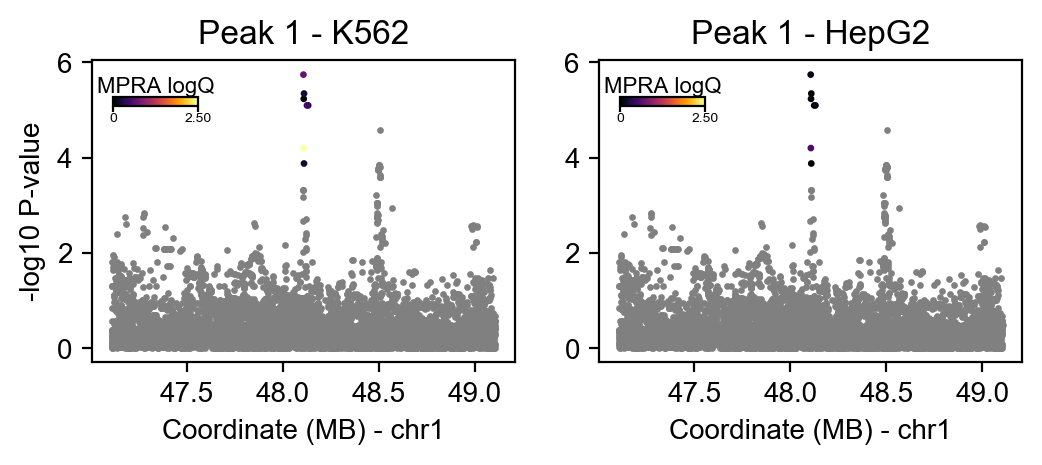

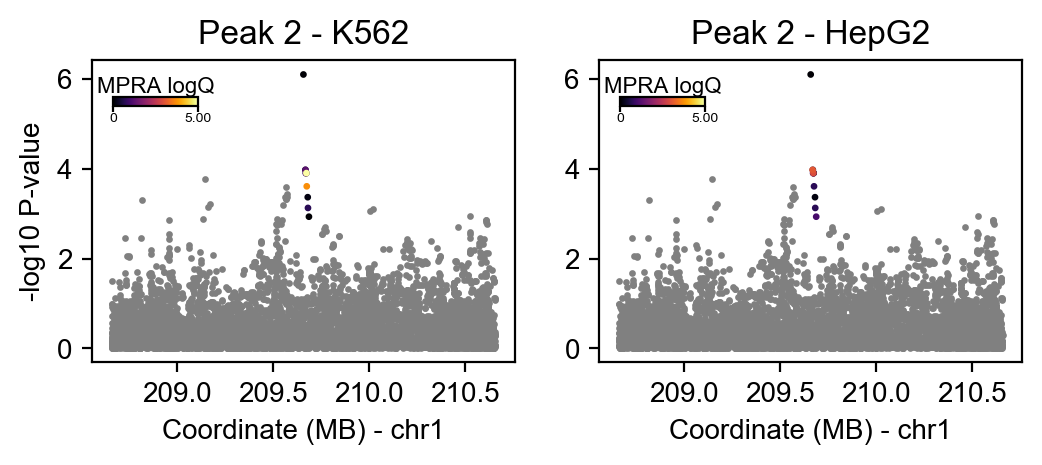

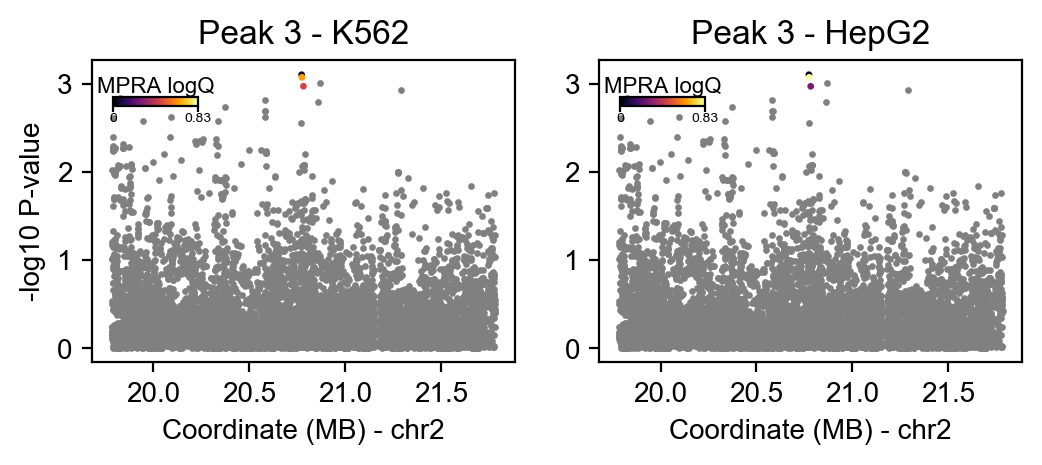

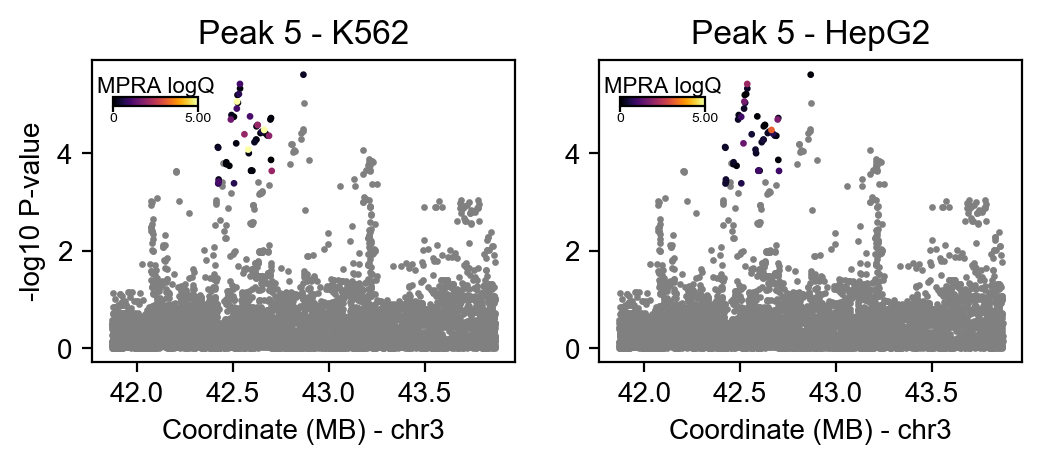

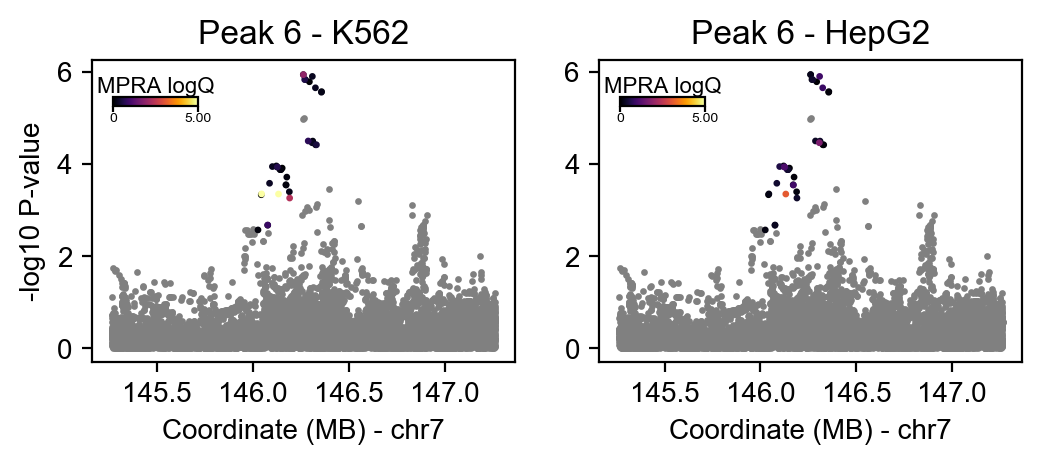

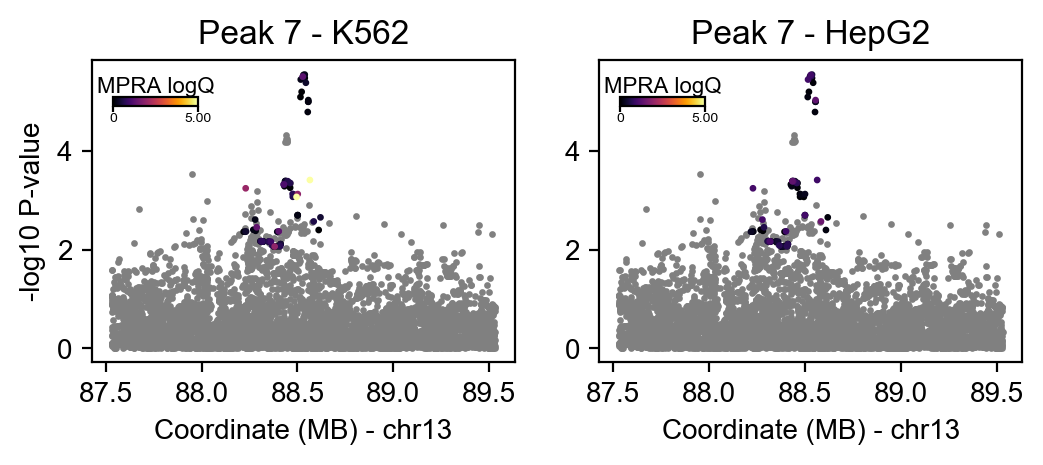

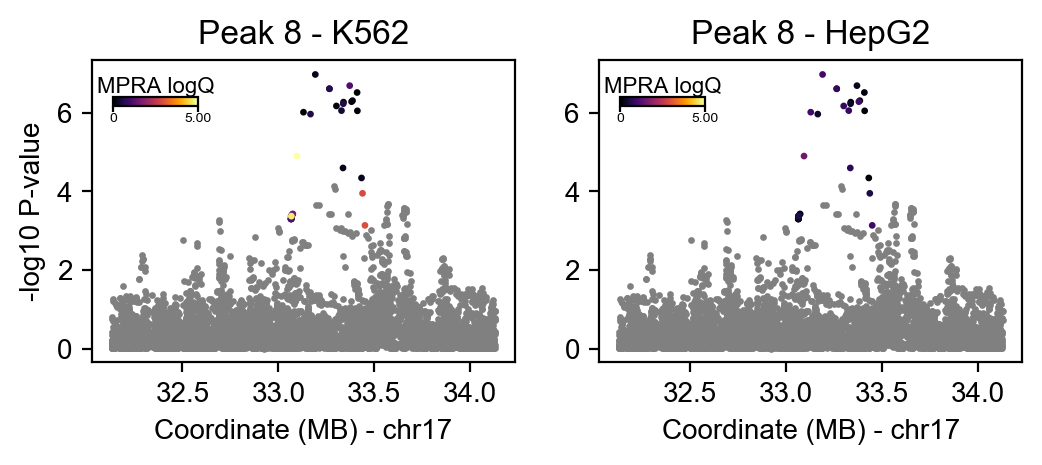

In [23]:
vmin = 0
vmax_thresh = 5
thresh = -1*np.log10(0.05)
for peak in runvars_k562.loc[runvars_k562['Skew_logFDR']>2, 'Peak'].unique():
    lead_data = runvars_k562.loc[runvars_k562['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
    if leadpheno == 'Outcome':
        continue
        
    toplot = suscept_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    vmax = max(toplot.loc[:, 'K562_Skew_logFDR'].max(), toplot.loc[:, 'HepG2_Skew_logFDR'].max())
    vmax = min(vmax, vmax_thresh)
        
    (fig,axes) = plt.subplots(1,2, figsize=(6,2), dpi=200)
    for i,k in enumerate(['K562', 'HepG2']):
        col = '%s_Skew_logFDR' % k 
        toplot = toplot.sort_values(by=col, ascending=True)

        ind = toplot[col].isnull()

        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='gray')
        cdat = axes[i].scatter(toplot.loc[~ind, 'POS']/1e6, toplot.loc[~ind, 'logP'],
           c=toplot.loc[~ind, col], s=2, vmin=vmin, vmax=vmax, cmap='inferno')
        
        if i == 0:
            axes[i].set_ylabel('-log10 P-value')
            
        axes[i].set_xlabel('Coordinate (MB) - chr%s' % leadchrom)
        axes[i].set_title('Peak %d - %s' % (peak, k))
        cax = axes[i].inset_axes([0.05, .85, 0.2, 0.03], transform=axes[i].transAxes)
        cbar = fig.colorbar(cdat, ax=axes[i], cax=cax, orientation='horizontal', ticks=[vmin, vmax])
        cax.set_title('MPRA logQ', fontsize=8, pad=1)
        #cbar.ax.set_xticks([vmin, vmax])
        cax.set_xticklabels([vmin, '%.2f' % vmax])
        cax.tick_params(labelsize=5, length=2, pad=.5)

In [24]:
toplot.head().T

MarkerID,"17:33066340[b37]G,A","17:33073821[b37]G,A","17:33433203[b37]T,C","17:33339333[b37]C,T","17:33065505[b37]T,C"
MissingRate,0,0,0,0,0
BETA,1.24071,1.25598,1.20628,1.69305,1.24129
SE,0.377486,0.373191,0.308286,0.347095,0.377398
Tstat,8.05089,8.33614,12.1376,13.2981,8.05789
p.value,0.000506722,0.000382021,4.56057e-05,5.36458e-07,0.000502561
Is.SPA,True,True,True,True,True
AF_case,0.0633197,0.0645492,0.112705,0.0934426,0.0633197
AF_ctrl,0.023373,0.0238736,0.0413016,0.0234043,0.0233104
N_case,122,122,122,122,122
N_ctrl,799,799,799,799,799


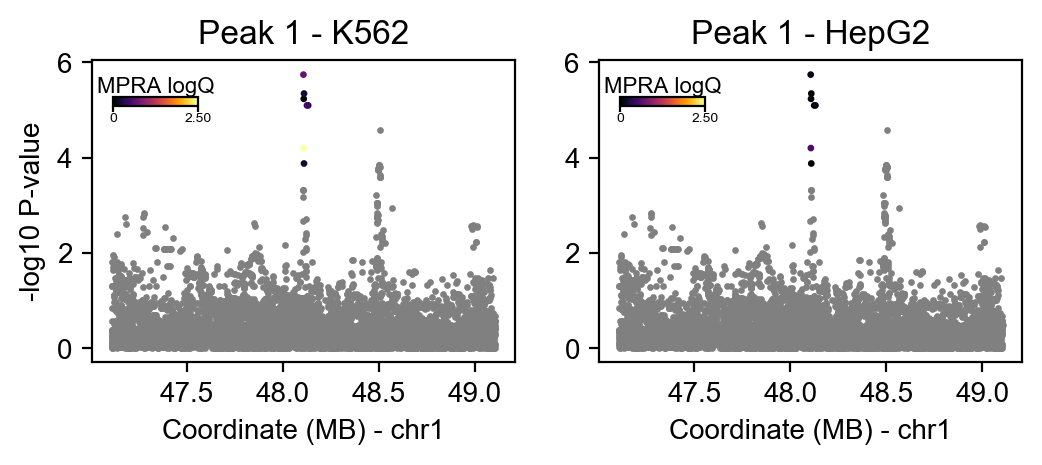

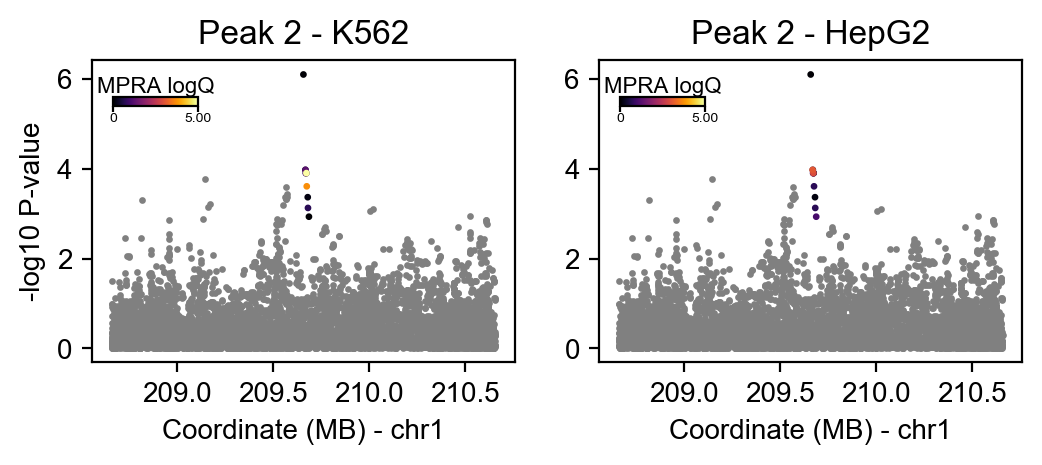

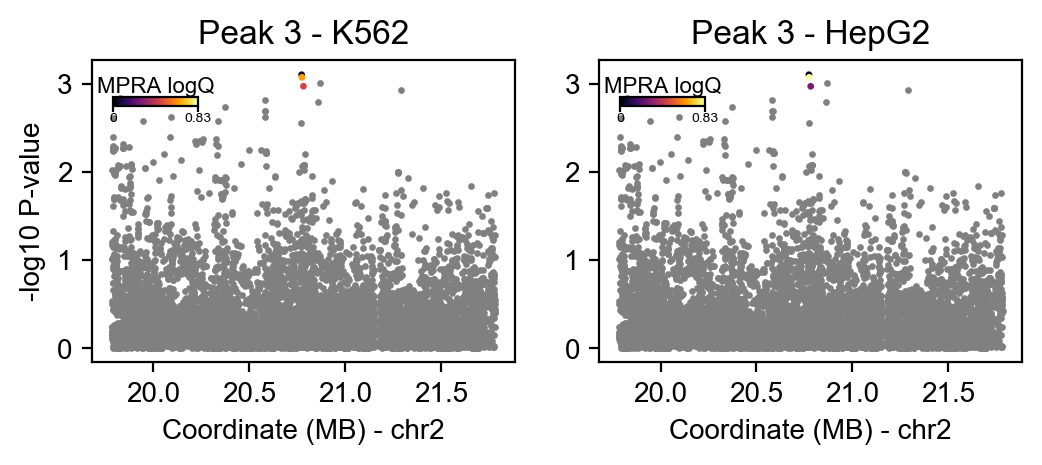

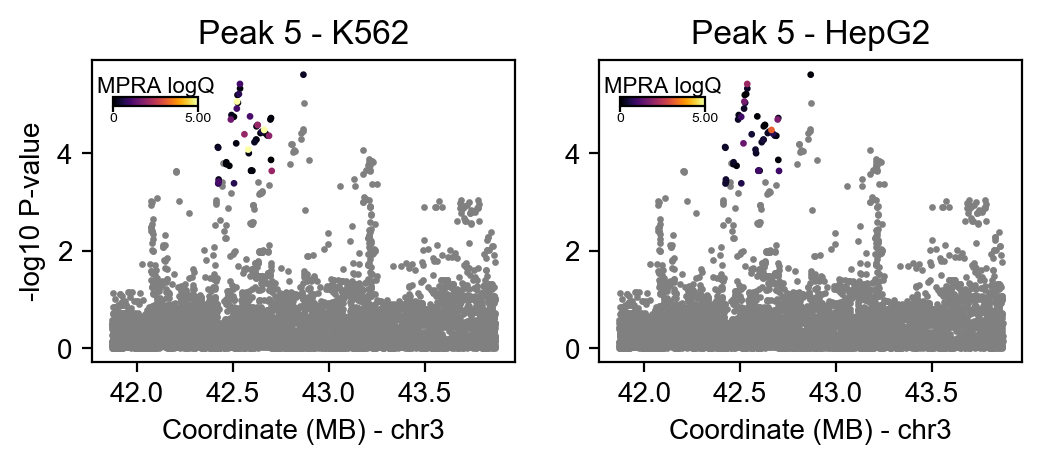

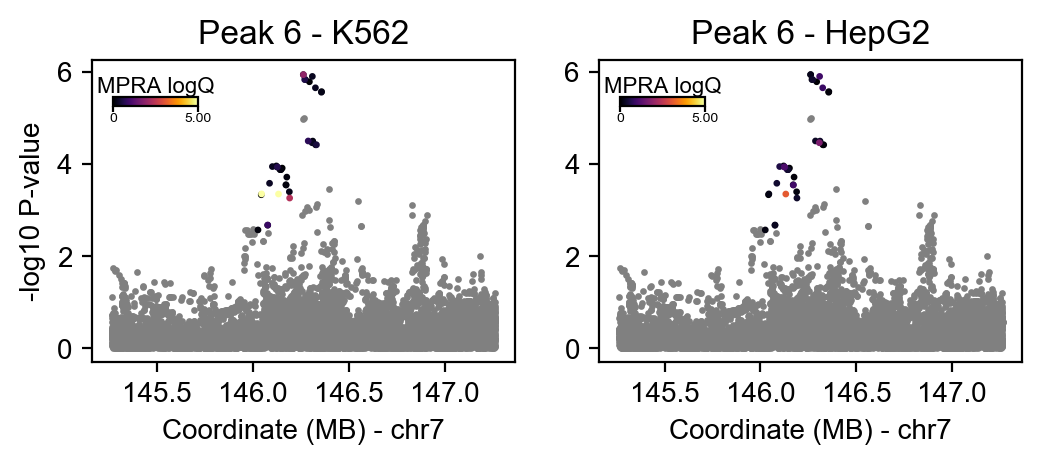

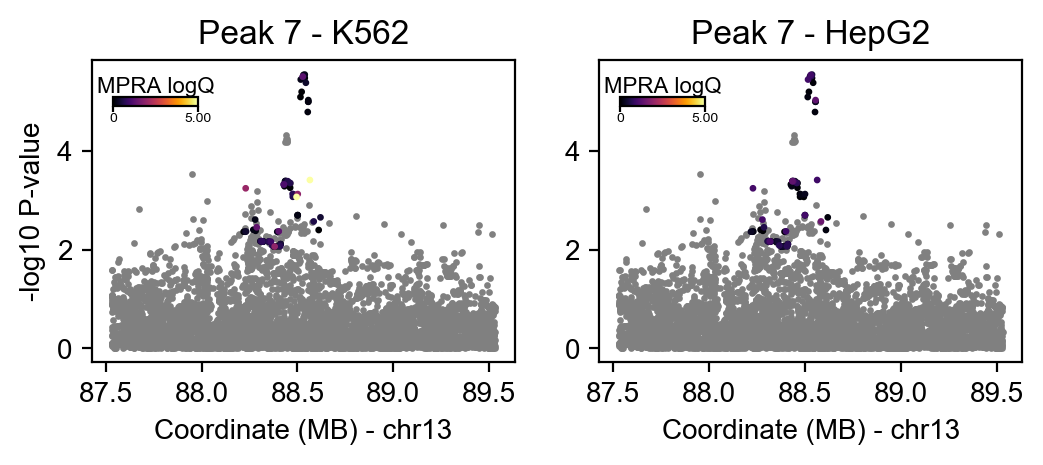

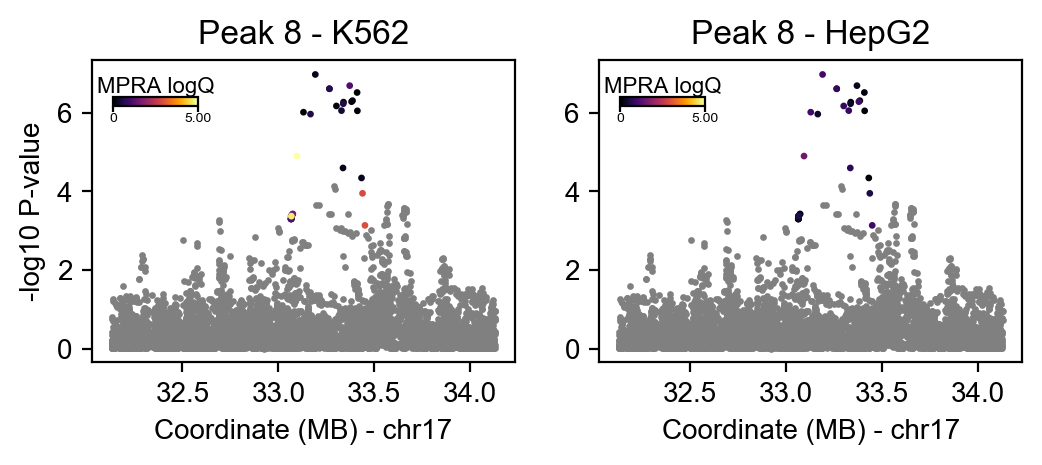

In [25]:
vmin = 0
vmax_thresh = 5
thresh = -1*np.log10(0.05)
for peak in runvars_k562.loc[runvars_k562['Skew_logFDR']>2, 'Peak'].unique():
    lead_data = runvars_k562.loc[runvars_k562['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
    if leadpheno == 'Outcome':
        continue
        
    toplot = suscept_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    vmax = max(toplot.loc[:, 'K562_Skew_logFDR'].max(), toplot.loc[:, 'HepG2_Skew_logFDR'].max())
    vmax = min(vmax, vmax_thresh)
        
    (fig,axes) = plt.subplots(1,2, figsize=(6,2), dpi=200)
    for i,k in enumerate(['K562', 'HepG2']):
        col = '%s_Skew_logFDR' % k 
        toplot = toplot.sort_values(by=col, ascending=True)

        ind = toplot[col].isnull()

        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='gray')
        cdat = axes[i].scatter(toplot.loc[~ind, 'POS']/1e6, toplot.loc[~ind, 'logP'],
           c=toplot.loc[~ind, col], s=2, vmin=vmin, vmax=vmax, cmap='inferno')
        
        if i == 0:
            axes[i].set_ylabel('-log10 P-value')
            
        axes[i].set_xlabel('Coordinate (MB) - chr%s' % leadchrom)
        axes[i].set_title('Peak %d - %s' % (peak, k))
        cax = axes[i].inset_axes([0.05, .85, 0.2, 0.03], transform=axes[i].transAxes)
        cbar = fig.colorbar(cdat, ax=axes[i], cax=cax, orientation='horizontal', ticks=[vmin, vmax])
        cax.set_title('MPRA logQ', fontsize=8, pad=1)
        #cbar.ax.set_xticks([vmin, vmax])
        cax.set_xticklabels([vmin, '%.2f' % vmax])
        cax.tick_params(labelsize=5, length=2, pad=.5)

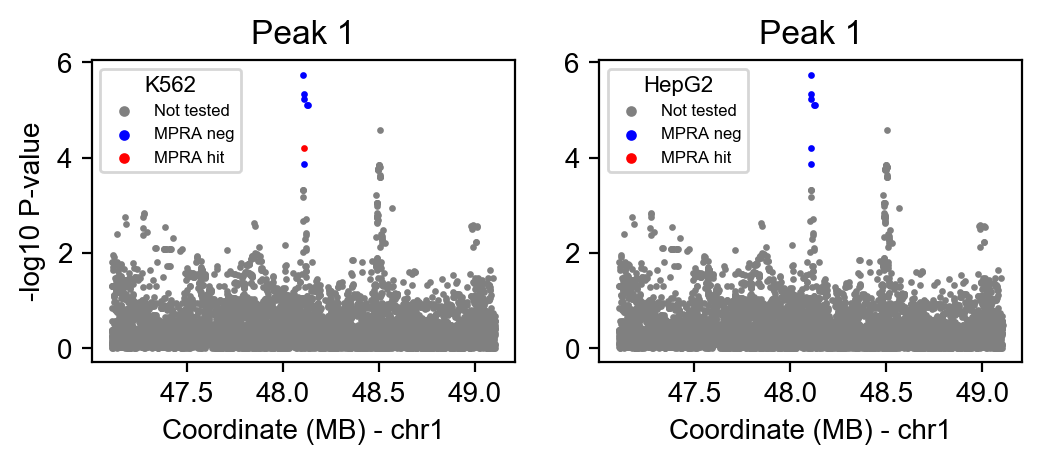

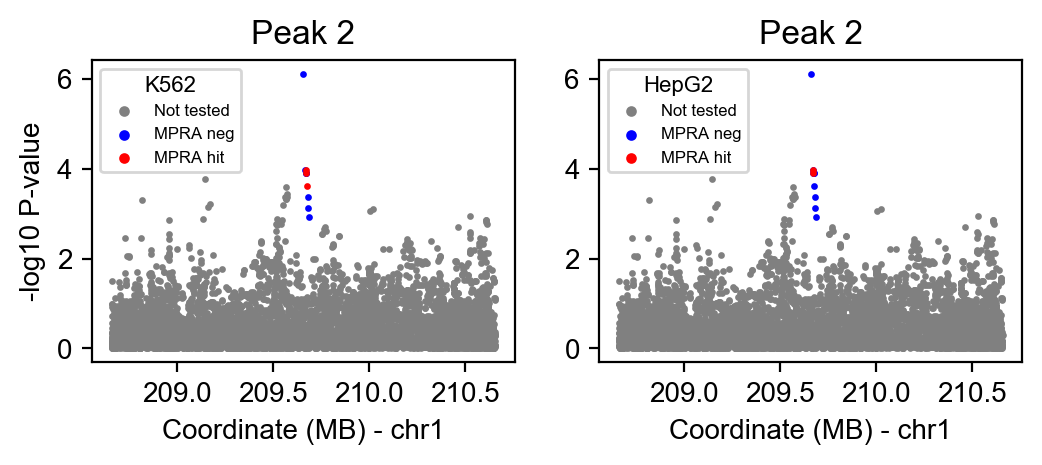

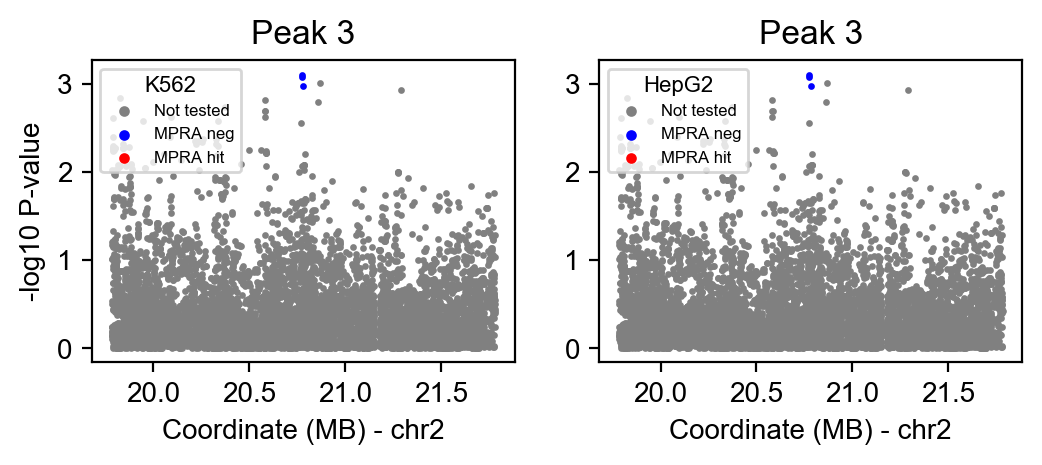

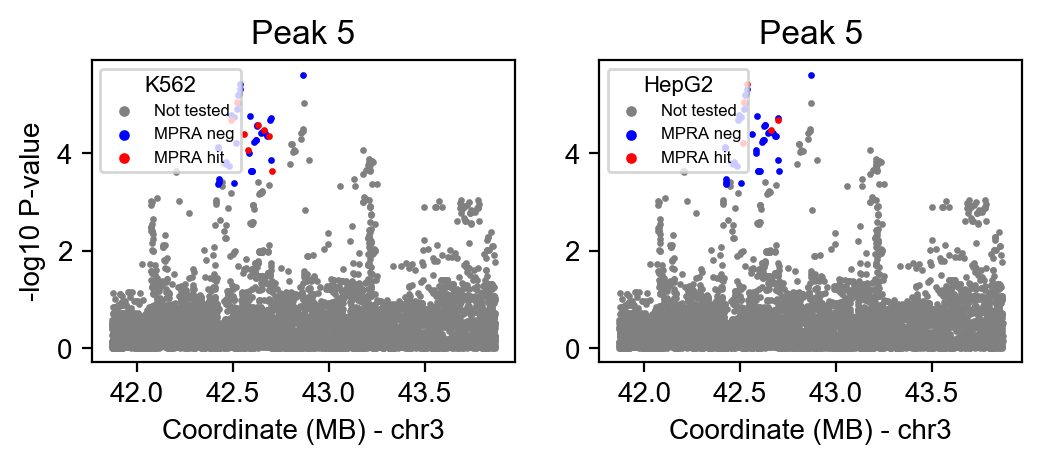

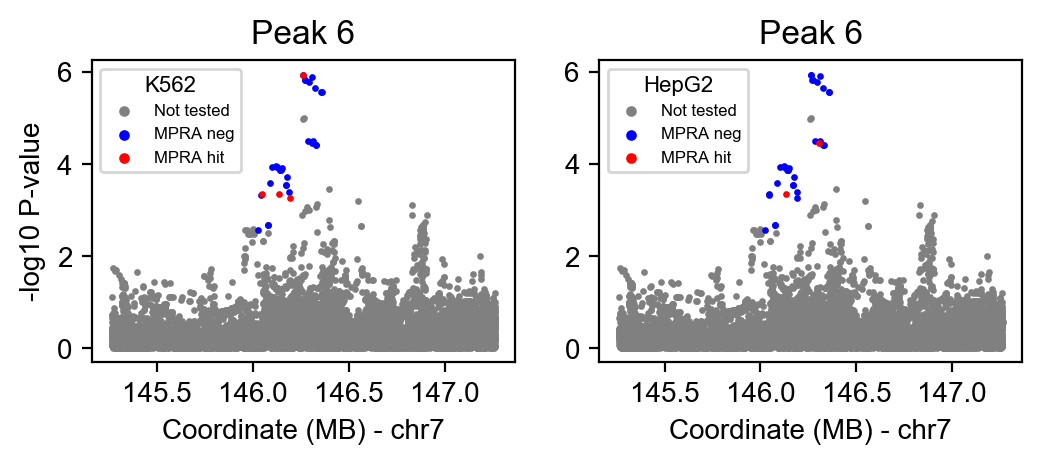

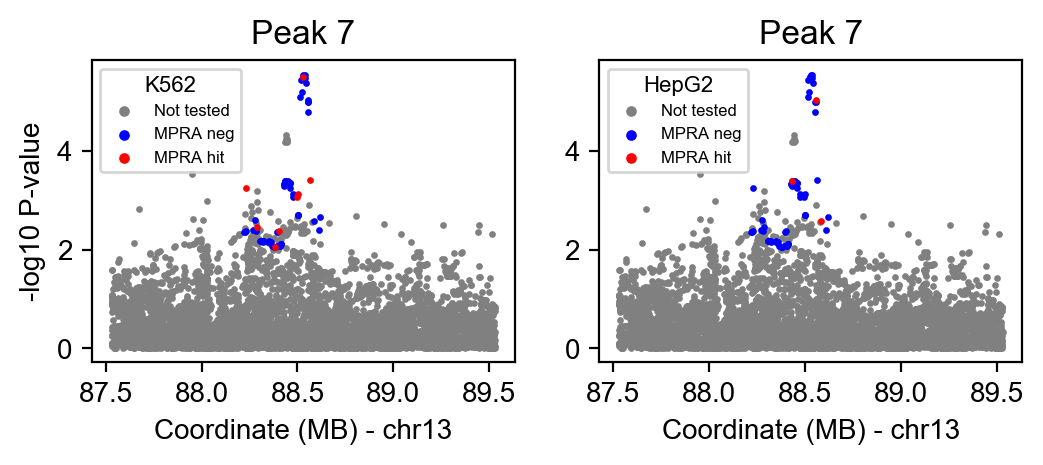

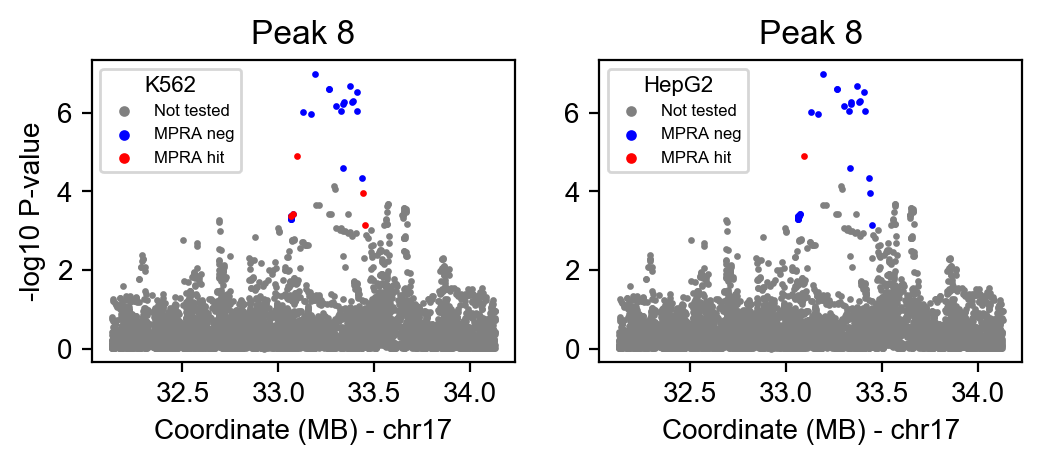

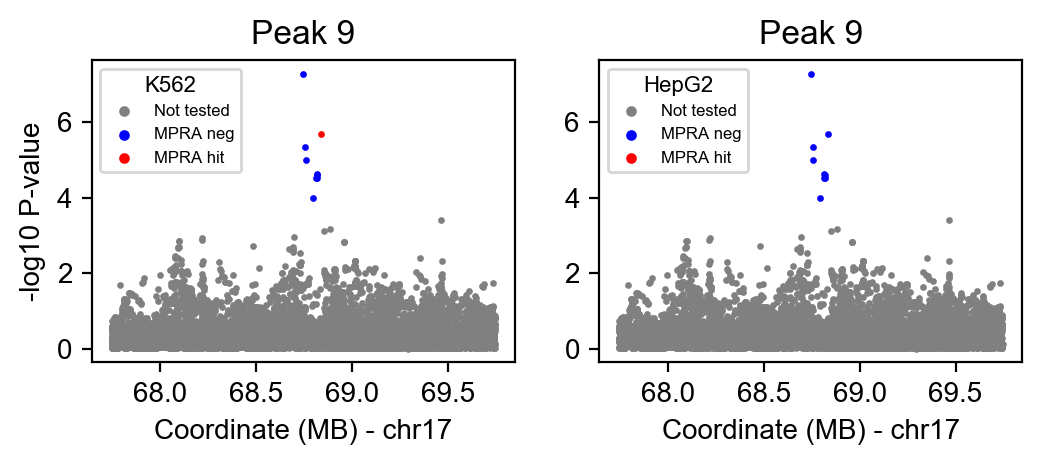

In [26]:
vmin = 0
thresh = -1*np.log10(0.05)
for peak in runvars_k562['Peak'].unique():
    lead_data = runvars_k562.loc[runvars_k562['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
    if leadpheno == 'Outcome':
        continue
        
    toplot = suscept_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    (fig,axes) = plt.subplots(1,2, figsize=(6,2), dpi=200)
    for i,k in enumerate(['K562', 'HepG2']):
        col = '%s_Skew_logFDR' % k 
        ind = toplot[col].isnull()
        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='gray', label='Not tested')
        ind = ~toplot[col].isnull() & (toplot[col]<thresh)
        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='blue', label='MPRA neg')
        ind = ~toplot[col].isnull() & (toplot[col]>thresh)
        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='red', label='MPRA hit')
        
        if i == 0:
            axes[i].set_ylabel('-log10 P-value')
            
        axes[i].set_xlabel('Coordinate (MB) - chr%s' % leadchrom)
        axes[i].set_title('Peak %d' % peak)
        
        lg = axes[i].legend(loc='upper left', markerscale=2, fontsize=6, title=k)
        lg.get_title().set_fontsize(8)

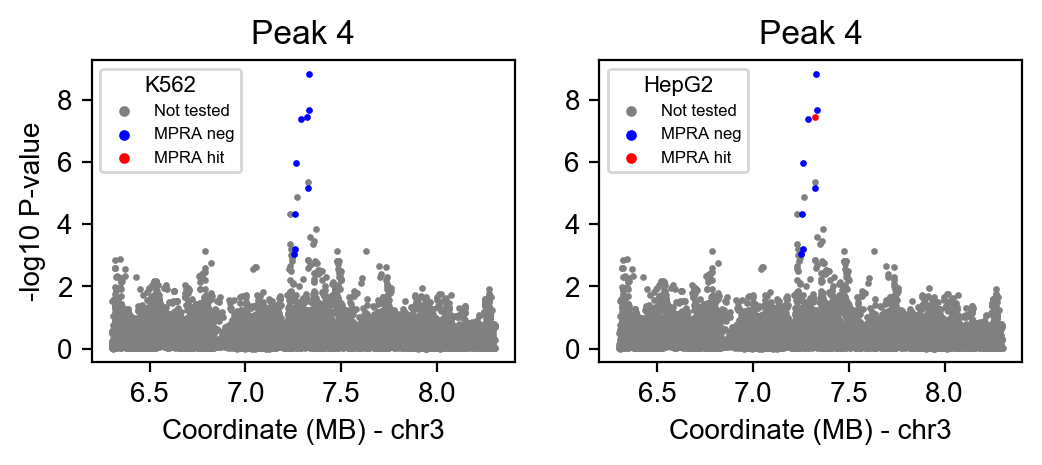

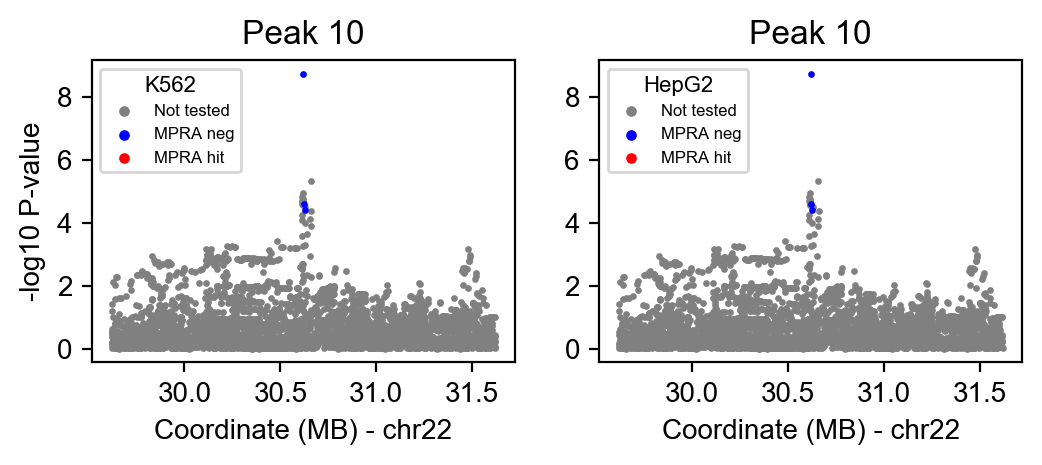

In [27]:
vmin = 0
thresh = -1*np.log10(0.05)
for peak in runvars_k562['Peak'].unique():
    lead_data = runvars_k562.loc[runvars_k562['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
    if leadpheno != 'Outcome':
        continue
        
    toplot = outcome_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    (fig,axes) = plt.subplots(1,2, figsize=(6,2), dpi=200)
    for i,k in enumerate(['K562', 'HepG2']):
        col = '%s_Skew_logFDR' % k 
        ind = toplot[col].isnull()
        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='gray', label='Not tested')
        ind = ~toplot[col].isnull() & (toplot[col]<thresh)
        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='blue', label='MPRA neg')
        ind = ~toplot[col].isnull() & (toplot[col]>thresh)
        axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=2, color='red', label='MPRA hit')
        
        if i == 0:
            axes[i].set_ylabel('-log10 P-value')
            
        axes[i].set_xlabel('Coordinate (MB) - chr%s' % leadchrom)
        axes[i].set_title('Peak %d' % peak)
        
        lg = axes[i].legend(loc='upper left', markerscale=2, fontsize=6, title=k)
        lg.get_title().set_fontsize(8)

In [28]:
outcome_data['Meta'].sort_values(by='p.value', ascending=True).head(10)

,Allele1,Allele2,Weight,Zscore,p.value,Direction,CHR,POS,logP,K562_Skew_logFDR,...,K562_B_logPadj_BH,K562_A_log2FC,K562_B_log2FC,K562_skewStat,HepG2_Skew_logFDR,HepG2_A_logPadj_BH,HepG2_B_logPadj_BH,HepG2_A_log2FC,HepG2_B_log2FC,HepG2_skewStat
MarkerName,,,,,,,,,,,,,,,,,,,,,
"3:7330265[b37]A,G",a,g,303.0,6.040,1.543000e-09,+?,3,7330265,8.811634,0.222011,...,1.689744,-0.593111,-0.433348,0.925500,0.214946,0.012812,0.232703,-0.013356,0.140244,0.925057
"22:30619983[b37]G,A",a,g,411.0,6.003,1.939000e-09,++,22,30619983,8.712422,0.006320,...,0.094262,-0.157742,-0.208771,-0.049117,1.102587,0.026675,0.965993,-0.142262,1.264604,2.541507
"3:7332556[b37]G,A",a,g,303.0,-5.596,2.193000e-08,-?,3,7332556,7.658961,0.832635,...,11.166992,1.362067,0.959057,-1.977798,0.134706,0.133703,0.111503,-0.162599,0.117131,0.692090
"3:7322569[b37]C,T",t,c,303.0,-5.513,3.524000e-08,-?,3,7322569,7.452964,0.148408,...,0.582934,-0.494747,-0.320491,0.689106,2.110904,1.049541,0.015597,-0.805045,-0.017518,3.370748
"3:7287290[b37]T,C",t,c,303.0,5.489,4.046000e-08,+?,3,7287290,7.392974,0.002585,...,1.023741,0.488570,0.507423,0.011903,0.015741,0.311193,0.597801,0.364344,0.509903,0.193104
"17:31757349[b37]C,T",t,c,303.0,-5.313,1.080000e-07,-?,17,31757349,6.966576,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2:215526735[b37]G,A",a,g,303.0,5.042,4.601000e-07,+?,2,215526735,6.337148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"5:8702372[b37]A,G",a,g,411.0,4.918,8.758000e-07,++,5,8702372,6.057595,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"7:70552362[b37]C,A",a,c,303.0,-4.912,9.006000e-07,-?,7,70552362,6.045468,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
leadchrom
str(leadpos)
leadcohort

'Meta'

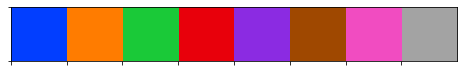

In [30]:
pal = "bright"
sns.palplot(sns.color_palette(pal, 8))
neg = sns.color_palette(pal, 8)[0]
pos = sns.color_palette(pal, 8)[3]
untested = sns.color_palette(pal, 8)[7]

In [31]:
idmap = pd.read_csv('gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/varidmap.tsv', sep='\t')
var2id = dict(zip(idmap['POSID'], idmap['ID']))
idmap.head()

,POSID,ID
0,"1:723918[b37]G,A",rs144434834
1,"1:724103[b37]A,G",rs111533735
2,"1:724169[b37]A,G",.
3,"1:724300[b37]C,T",rs12069907
4,"1:725286[b37]G,A",rs111203397


In [32]:
suscept_data.keys()

dict_keys(['NG', 'SL', 'Meta'])

In [33]:
(7.5-(7.5*.1)*2) / 3

2.0

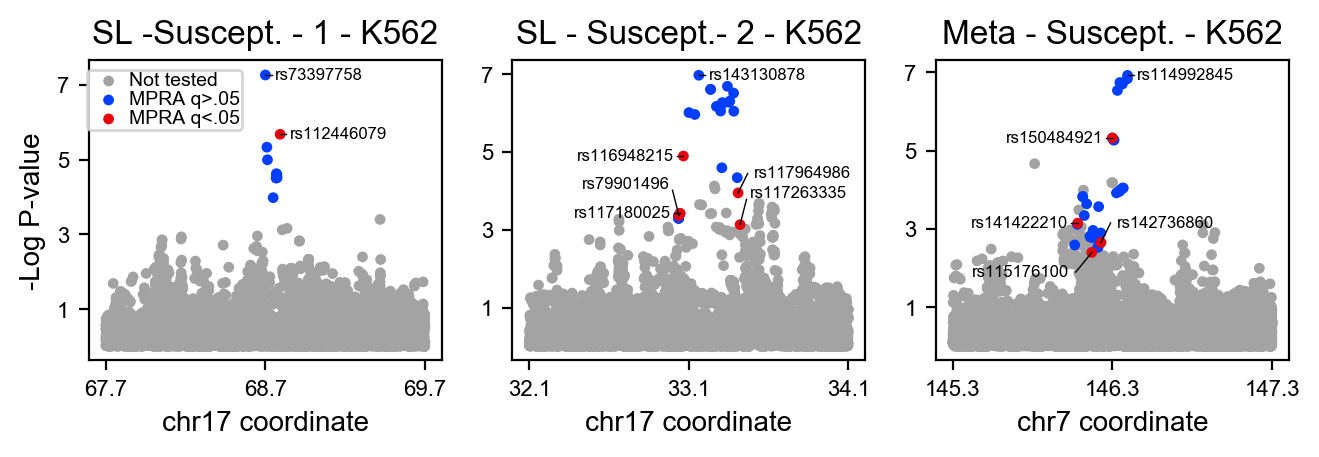

In [72]:
(fig,axes) = plt.subplots(1,3, figsize=(7.5,2.5),
                          dpi=200, gridspec_kw={'wspace':.2, 'left':.1, 'right':.9, 'bottom':.25, 'top':.85})
k = 'K562'
thresh = -1*np.log10(0.05)
namemap = {8:'SL - Suscept.- 2 - K562', 9: 'SL -Suscept. - 1 - K562', 6:'Meta - Suscept. - K562'}
cohortmap = {8:'SL', 9: 'SL', 6:'Meta'}

s=15
snplabfontsize=6
lw = .5
for i,peak in enumerate([9, 8, 6]):
    lead_data = runvars_k562.loc[runvars_k562['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = cohortmap[peak] #lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
        
    toplot = suscept_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    col = '%s_Skew_logFDR' % k 
    ind = toplot[col].isnull()
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=untested, label='Not tested', edgecolor='None', linewidth=.1)
    ind = ~toplot[col].isnull() & (toplot[col]<thresh)
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=neg, label='MPRA q>.05', edgecolor='None', linewidth=.1)
    sigind = ~toplot[col].isnull() & (toplot[col]>thresh)
    axes[i].scatter(toplot.loc[sigind, 'POS']/1e6, toplot.loc[sigind, 'logP'], s=s, color=pos, label='MPRA q<.05', edgecolor='None', linewidth=.1)
        
    if i == 0:
        axes[i].set_ylabel('-Log P-value', fontsize=10)
            
    axes[i].set_xlabel('chr%s coordinate' % leadchrom, fontsize=10)
    axes[i].set_title(namemap[peak], fontsize=12)
        
    if i ==0:
        lg = axes[i].legend(bbox_to_anchor=(.46 ,1), markerscale=1, fontsize=7,
                            labelspacing=.05, handletextpad=.03, borderpad=.1,
                            borderaxespad=None)
        
    minv = toplot['POS'].min() / 1e6
    delta = (toplot['POS'].max() /1e6) - minv    
    axes[i].set_xticks([minv, minv+delta*.5, minv+delta])
    axes[i].set_xticklabels([np.round(x, decimals=1) for x in [minv, minv+delta*.5, minv+delta]], fontsize=8)
    axes[i].set_yticks([1,3,5,7,9])
    axes[i].set_yticklabels([1,3,5,7,9], fontsize=8)
    
    maxind = toplot.sort_values(by='p.value').index[0]
    axes[i].text((toplot.loc[maxind, 'POS']/1e6) + delta*.03, toplot.loc[maxind, 'logP'], var2id[maxind], ha='left', va='center', fontsize=snplabfontsize)
    axes[i].plot([(toplot.loc[maxind, 'POS']/1e6), (toplot.loc[maxind, 'POS']/1e6) + delta*.02],
                 [toplot.loc[maxind, 'logP'], toplot.loc[maxind, 'logP']], 'k', linewidth=lw)
    
    for var in sigind.index[sigind]:
        if var in ['17:33095679[b37]C,T', '17:33075519[b37]T,A', '7:146262071[b37]C,T', '7:146044055[b37]C,T']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=lw)  
        elif var in ['17:33451053[b37]C,A']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.03, toplot.loc[var, 'logP']+.8, var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']+.65], 'k', linewidth=lw)
            
        elif var in ['17:33438466[b37]C,T', '7:146190279[b37]G,A']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.05, toplot.loc[var, 'logP']+.5, var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.03],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']+.5], 'k', linewidth=lw)
        elif var in ['7:146132191[b37]G,A']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.07, toplot.loc[var, 'logP']-.5, var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.05],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']-.5], 'k', linewidth=lw)   
        elif var in ['17:33067593[b37]C,T']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.03, toplot.loc[var, 'logP']+.8, var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']+.65], 'k', linewidth=lw) 
        else:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=lw)

        
plt.savefig('../../figures/MPRA_Susceptibility_Peaks.png')        
plt.savefig('../../figures/MPRA_Susceptibility_Peaks.pdf')        
        
#ax.set_xticklabels(np.arange(1,21, step = 2), fontsize=7)


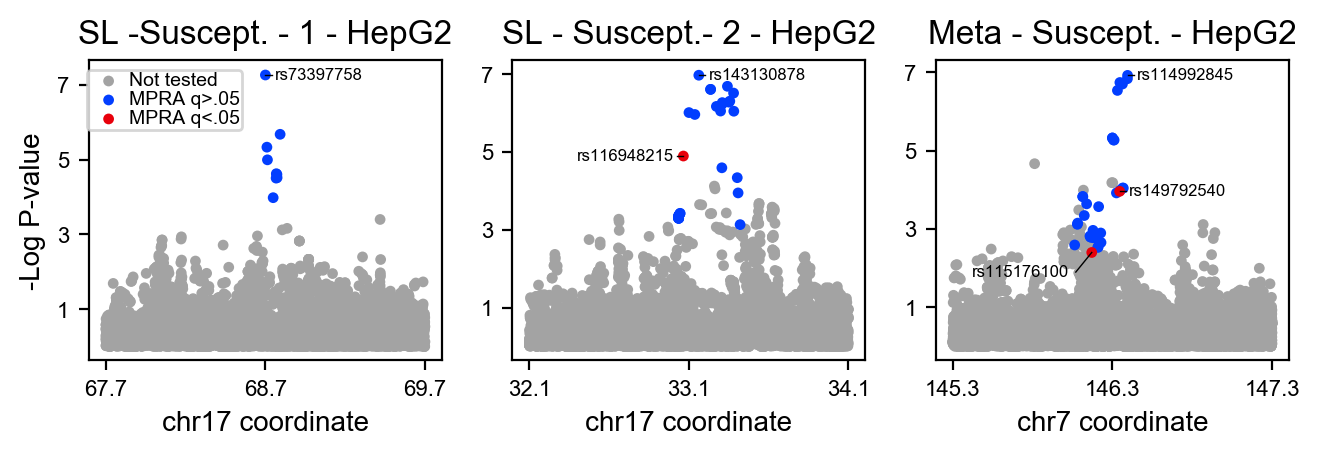

In [35]:
(fig,axes) = plt.subplots(1,3, figsize=(7.5,2.5),
                          dpi=200, gridspec_kw={'wspace':.2, 'left':.1, 'right':.9, 'bottom':.25, 'top':.85})
k = 'HepG2'
thresh = -1*np.log10(0.05)
namemap = {8:'SL - Suscept.- 2 - HepG2', 9: 'SL -Suscept. - 1 - HepG2', 6:'Meta - Suscept. - HepG2'}
cohortmap = {8:'SL', 9: 'SL', 6:'Meta'}

s=15
snplabfontsize=6
lw = .5
for i,peak in enumerate([9, 8, 6]):
    lead_data = runvars_hepg2.loc[runvars_hepg2['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = cohortmap[peak] #lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
        
    toplot = suscept_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    col = '%s_Skew_logFDR' % k 
    ind = toplot[col].isnull()
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=untested, label='Not tested', edgecolor='None', linewidth=.1)
    ind = ~toplot[col].isnull() & (toplot[col]<thresh)
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=neg, label='MPRA q>.05', edgecolor='None', linewidth=.1)
    sigind = ~toplot[col].isnull() & (toplot[col]>thresh)
    axes[i].scatter(toplot.loc[sigind, 'POS']/1e6, toplot.loc[sigind, 'logP'], s=s, color=pos, label='MPRA q<.05', edgecolor='None', linewidth=.1)
        
    if i == 0:
        axes[i].set_ylabel('-Log P-value', fontsize=10)
            
    axes[i].set_xlabel('chr%s coordinate' % leadchrom, fontsize=10)
    axes[i].set_title(namemap[peak], fontsize=12)
        
    if i ==0:
        lg = axes[i].legend(bbox_to_anchor=(.46 ,1), markerscale=1, fontsize=7,
                            labelspacing=.05, handletextpad=.03, borderpad=.1,
                            borderaxespad=None)
        
    minv = toplot['POS'].min() / 1e6
    delta = (toplot['POS'].max() /1e6) - minv    
    axes[i].set_xticks([minv, minv+delta*.5, minv+delta])
    axes[i].set_xticklabels([np.round(x, decimals=1) for x in [minv, minv+delta*.5, minv+delta]], fontsize=8)
    axes[i].set_yticks([1,3,5,7,9])
    axes[i].set_yticklabels([1,3,5,7,9], fontsize=8)
    
    maxind = toplot.sort_values(by='p.value').index[0]
    axes[i].text((toplot.loc[maxind, 'POS']/1e6) + delta*.03, toplot.loc[maxind, 'logP'], var2id[maxind], ha='left', va='center', fontsize=snplabfontsize)
    axes[i].plot([(toplot.loc[maxind, 'POS']/1e6), (toplot.loc[maxind, 'POS']/1e6) + delta*.02],
                 [toplot.loc[maxind, 'logP'], toplot.loc[maxind, 'logP']], 'k', linewidth=lw)
    
    for var in sigind.index[sigind]:
        if var in ['17:33095679[b37]C,T', '17:33075519[b37]T,A', '7:146262071[b37]C,T', '7:146044055[b37]C,T']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=lw)  
        elif var in ['17:33451053[b37]C,A']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.03, toplot.loc[var, 'logP']+.8, var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']+.65], 'k', linewidth=lw)
            
        elif var in ['17:33438466[b37]C,T', '7:146190279[b37]G,A']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.05, toplot.loc[var, 'logP']+.5, var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.03],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']+.5], 'k', linewidth=lw)
        elif var in ['7:146132191[b37]G,A']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.07, toplot.loc[var, 'logP']-.5, var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.05],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']-.5], 'k', linewidth=lw)   
        elif var in ['17:33067593[b37]C,T']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.03, toplot.loc[var, 'logP']+.8, var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']+.65], 'k', linewidth=lw) 
        else:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=lw)

        
plt.savefig('../../figures/MPRA_Susceptibility_Peaks_HepG2.png')        
plt.savefig('../../figures/MPRA_Susceptibility_Peaks_HepG2.pdf')        
        
#ax.set_xticklabels(np.arange(1,21, step = 2), fontsize=7)


In [36]:
idmap.loc[idmap['ID'].isin(['rs112446079', 'rs73397758']), :]

,POSID,ID
7689813,"17:68745251[b37]C,G",rs73397758
7690443,"17:68837499[b37]A,G",rs112446079


In [37]:
runvars_k562.loc['17:68837499[b37]A,G', :]

CHR                                            17
POS                                      68837499
REF                                             A
ALT                                             G
Leadvar_ID                    17:68745251[b37]C,G
R2                                       0.555778
Cohort                                         SL
Pheno                              Susceptibility
Leadvar_P                             4.19441e-09
Peak                                            9
ID                           17:68837499:A:G:R:wC
comb               17:68837499:A:G_center_fwd_ref
Log2Skew                                -0.639438
Skew_SE                                  0.238025
skewStat                                 -2.68643
Skew_logP                                 2.14134
Skew_logFDR                               1.50865
Skew_logFDR_act                               NaN
A_logPadj_BH                             0.479257
B_logPadj_BH                              1.42073


In [38]:
10**(-1.50865)

0.03099916530373482

In [39]:
69093915-69198320

-104405

In [40]:
69093915-68745251, 69093915-68837499

(348664, 256416)

In [41]:
idmap.loc[idmap['ID'].isin(['rs143130878', 'rs116948215']), :]

,POSID,ID
7462043,"17:33095679[b37]C,T",rs116948215
7462738,"17:33192408[b37]C,G",rs143130878


In [42]:
runvars_k562.loc['17:33095679[b37]C,T', :]

CHR                                            17
POS                                      33095679
REF                                             C
ALT                                             T
Leadvar_ID                    17:33130719[b37]C,T
R2                                       0.833928
Cohort                                         SL
Pheno                              Susceptibility
Leadvar_P                             5.68886e-08
Peak                                            8
ID                           17:33095679:C:T:R:wC
comb               17:33095679:C:T_center_fwd_ref
Log2Skew                                 -0.97751
Skew_SE                                  0.189167
skewStat                                 -5.16746
Skew_logP                                  6.6247
Skew_logFDR                               5.71058
Skew_logFDR_act                           6.09928
A_logPadj_BH                               23.111
B_logPadj_BH                              1.11722


In [43]:
10**-5.71058

1.9472423216119587e-06

In [44]:
idmap.loc[idmap['ID'].isin(['rs181032423', 'rs150484921']), :]

,POSID,ID
18328377,"7:146262071[b37]C,T",rs150484921
18328765,"7:146308575[b37]T,C",rs181032423


In [45]:
runvars_k562.loc['7:146262071[b37]C,T', :]

CHR                                             7
POS                                     146262071
REF                                             C
ALT                                             T
Leadvar_ID                    7:146293176[b37]T,A
R2                                              1
Cohort                                         NG
Pheno                              Susceptibility
Leadvar_P                             9.35993e-08
Peak                                            6
ID                           7:146262071:C:T:R:wC
comb               7:146262071:C:T_center_fwd_ref
Log2Skew                                -0.645392
Skew_SE                                  0.211149
skewStat                                 -3.05657
Skew_logP                                 2.64997
Skew_logFDR                               1.96779
Skew_logFDR_act                               NaN
A_logPadj_BH                           0.00240769
B_logPadj_BH                              1.05849


In [46]:
10**(-1.96779)

0.010769858565746289

In [47]:
(5-(5*.1)*2) / 2

2.0

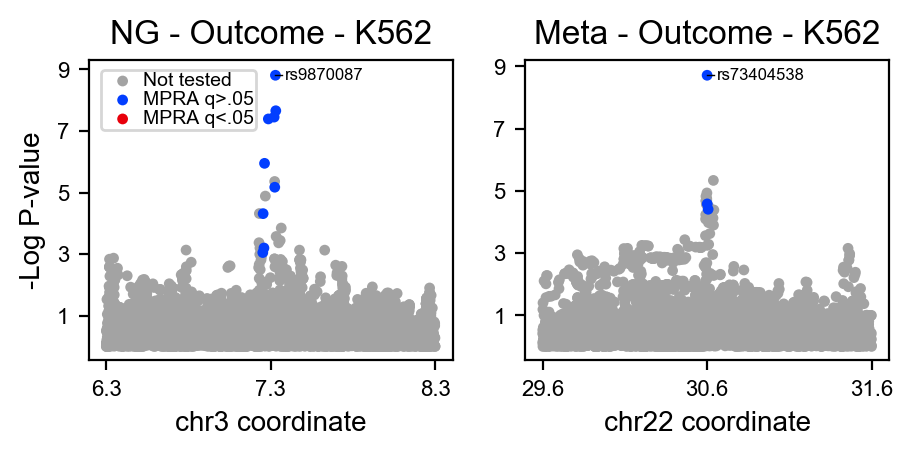

In [48]:
(fig,axes) = plt.subplots(1,2, figsize=(5,2.5), dpi=200, gridspec_kw={'wspace':.2, 'left':.1, 'right':.9, 'bottom':.25, 'top':.85})
k = 'K562'
thresh = -1*np.log10(0.05)
namemap = {4:'NG - Outcome - K562', 10: 'Meta - Outcome - K562'}
s=15
for i,peak in enumerate([4, 10]):
    lead_data = runvars_k562.loc[runvars_k562['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
        
    toplot = outcome_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    col = '%s_Skew_logFDR' % k 
    ind = toplot[col].isnull()
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=untested, label='Not tested', edgecolor='None', linewidth=.1)
    ind = ~toplot[col].isnull() & (toplot[col]<thresh)
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=neg, label='MPRA q>.05', edgecolor='None', linewidth=.1)
    sigind = ~toplot[col].isnull() & (toplot[col]>thresh)
    axes[i].scatter(toplot.loc[sigind, 'POS']/1e6, toplot.loc[sigind, 'logP'], s=s, color=pos, label='MPRA q<.05', edgecolor='None', linewidth=.1)
        
    if i == 0:
        axes[i].set_ylabel('-Log P-value', fontsize=10)
            
    axes[i].set_xlabel('chr%s coordinate' % leadchrom, fontsize=10)
    axes[i].set_title(namemap[peak], fontsize=12)
        
    if i ==0:
        lg = axes[i].legend(bbox_to_anchor=(.485 ,1), markerscale=1, fontsize=7,
                            labelspacing=.05, handletextpad=.03, borderpad=.1,
                            borderaxespad=None)
        
    minv = toplot['POS'].min() / 1e6
    delta = (toplot['POS'].max() /1e6) - minv    
    axes[i].set_xticks([minv, minv+delta*.5, minv+delta])
    axes[i].set_xticklabels([np.round(x, decimals=1) for x in [minv, minv+delta*.5, minv+delta]], fontsize=8)
    axes[i].set_yticks([1,3,5,7,9])
    axes[i].set_yticklabels([1,3,5,7,9], fontsize=8)
    
    maxind = toplot.sort_values(by='p.value').index[0]
    axes[i].text((toplot.loc[maxind, 'POS']/1e6) + delta*.03, toplot.loc[maxind, 'logP'], var2id[maxind], ha='left', va='center', fontsize=snplabfontsize)
    axes[i].plot([(toplot.loc[maxind, 'POS']/1e6), (toplot.loc[maxind, 'POS']/1e6) + delta*.02],
                 [toplot.loc[maxind, 'logP'], toplot.loc[maxind, 'logP']], 'k', linewidth=.5)
    
    for var in sigind.index[sigind]:
        
        if var not in var2id.keys():
            continue
        
        if var in ['3:7219712[b37]T,C']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=.5)  
        else:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=.5)

        
        
#ax.set_xticklabels(np.arange(1,21, step = 2), fontsize=7)

plt.savefig('../../figures/MPRA_Outcome_Peaks.png')        
plt.savefig('../../figures/MPRA_Outcome_Peaks.pdf')        
        
#ax.set_xticklabels(np.arange(1,21, step = 2), fontsize=7)


In [49]:
dict(zip(sigind.index[sigind], [var2id[x] for x in sigind.index[sigind]]))

{}

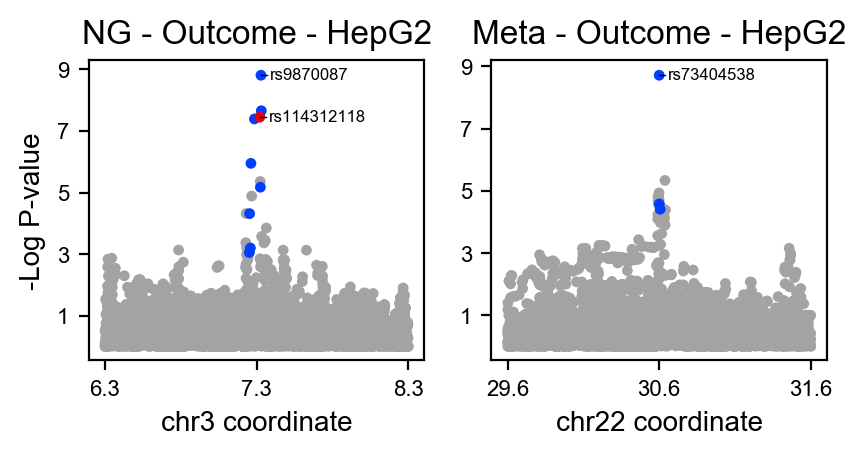

In [50]:
(fig,axes) = plt.subplots(1,2, figsize=(4.5,2.5), dpi=200, gridspec_kw={'wspace':.2, 'left':.09, 'right':.91, 'bottom':.25, 'top':.85})
k = 'HepG2'
thresh = -1*np.log10(0.05)
namemap = {4:'NG - Outcome - HepG2', 10: 'Meta - Outcome - HepG2'}
s=15
for i,peak in enumerate([4, 10]):
    lead_data = runvars_hepg2.loc[runvars_hepg2['Peak']==peak, :]
    leadvar = lead_data.iloc[0, 4]
    leadchrom = str(lead_data.at[leadvar, 'CHR'])
    leadpos = lead_data.at[leadvar, 'POS']
    leadcohort = lead_data.at[leadvar, 'Cohort']
    leadpheno = lead_data.at[leadvar, 'Pheno']
        
    toplot = outcome_data[leadcohort]
    peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
    toplot = toplot.loc[peakind, :]

    col = '%s_Skew_logFDR' % k 
    ind = toplot[col].isnull()
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=untested, label='Not tested', edgecolor='None', linewidth=.1)
    ind = ~toplot[col].isnull() & (toplot[col]<thresh)
    axes[i].scatter(toplot.loc[ind, 'POS']/1e6, toplot.loc[ind, 'logP'], s=s, color=neg, label='MPRA q>.05', edgecolor='None', linewidth=.1)
    sigind = ~toplot[col].isnull() & (toplot[col]>thresh)
    axes[i].scatter(toplot.loc[sigind, 'POS']/1e6, toplot.loc[sigind, 'logP'], s=s, color=pos, label='MPRA q<.05', edgecolor='None', linewidth=.1)
        
    if i == 0:
        axes[i].set_ylabel('-Log P-value', fontsize=10)
            
    axes[i].set_xlabel('chr%s coordinate' % leadchrom, fontsize=10)
    axes[i].set_title(namemap[peak], fontsize=12)
        
    '''
    if i ==1:
        lg = axes[i].legend(bbox_to_anchor=(.5 ,1), markerscale=1, fontsize=7,
                            labelspacing=.05, handletextpad=.03, borderpad=.1,
                            borderaxespad=None)
    '''
    
    minv = toplot['POS'].min() / 1e6
    delta = (toplot['POS'].max() /1e6) - minv    
    axes[i].set_xticks([minv, minv+delta*.5, minv+delta])
    axes[i].set_xticklabels([np.round(x, decimals=1) for x in [minv, minv+delta*.5, minv+delta]], fontsize=8)
    axes[i].set_yticks([1,3,5,7,9])
    axes[i].set_yticklabels([1,3,5,7,9], fontsize=8)
    
    maxind = toplot.sort_values(by='p.value').index[0]
    axes[i].text((toplot.loc[maxind, 'POS']/1e6) + delta*.03, toplot.loc[maxind, 'logP'], var2id[maxind], ha='left', va='center', fontsize=snplabfontsize)
    axes[i].plot([(toplot.loc[maxind, 'POS']/1e6), (toplot.loc[maxind, 'POS']/1e6) + delta*.02],
                 [toplot.loc[maxind, 'logP'], toplot.loc[maxind, 'logP']], 'k', linewidth=.5)
    
    for var in sigind.index[sigind]:
        
        if var not in var2id.keys():
            continue
        
        if var in ['3:7219712[b37]T,C']:
            axes[i].text((toplot.loc[var, 'POS']/1e6) - delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='right', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) - delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=.5)  
        else:
            axes[i].text((toplot.loc[var, 'POS']/1e6) + delta*.03, toplot.loc[var, 'logP'], var2id[var], ha='left', va='center', fontsize=snplabfontsize)
            axes[i].plot([(toplot.loc[var, 'POS']/1e6), (toplot.loc[var, 'POS']/1e6) + delta*.02],
                 [toplot.loc[var, 'logP'], toplot.loc[var, 'logP']], 'k', linewidth=.5)
        
#ax.set_xticklabels(np.arange(1,21, step = 2), fontsize=7)

plt.savefig('../../figures/MPRA_Outcome_Peaks_HepG2.png')        
plt.savefig('../../figures/MPRA_Outcome_Peaks_HepG2.pdf')        
        
#ax.set_xticklabels(np.arange(1,21, step = 2), fontsize=7)


In [51]:
runvars_k562[['CHR', 'Cohort', 'Pheno', 'Peak']].drop_duplicates()

,CHR,Cohort,Pheno,Peak
"1:48106017[b37]A,T",1,SL,Susceptibility,1
"1:209658594[b37]A,G",1,SL,Susceptibility,2
"2:20756077[b37]C,A",2,SL,Susceptibility,3
"3:7181241[b37]A,G",3,NG,Outcome,4
"3:42421456[b37]C,T",3,SL,Susceptibility,5
"7:146025264[b37]C,A",7,NG,Susceptibility,6
"7:146307089[b37]T,C",7,Meta,Susceptibility,6
"13:88219363[b37]G,A",13,NG,Susceptibility,7
"17:33065505[b37]T,C",17,SL,Susceptibility,8
"17:68745251[b37]C,G",17,SL,Susceptibility,9


In [52]:
peak = 4
lead_data = runvars_hepg2.loc[runvars_hepg2['Peak']==peak, :]
leadvar = lead_data.iloc[0, 4]
leadchrom = str(lead_data.at[leadvar, 'CHR'])
leadpos = lead_data.at[leadvar, 'POS']
leadcohort = lead_data.at[leadvar, 'Cohort']
leadpheno = lead_data.at[leadvar, 'Pheno']
        
toplot = outcome_data[leadcohort]
peakind = (toplot['CHR']==leadchrom) & ((toplot['POS']-leadpos).abs()<1e6)
toplot = toplot.loc[peakind, :]

In [53]:
#Log2Skew
runvars_hepg2.loc['3:7322569[b37]C,T', :]

CHR                                           3
POS                                     7322569
REF                                           C
ALT                                           T
Leadvar_ID                    3:7287290[b37]T,C
R2                                     0.861826
Cohort                                       NG
Pheno                                   Outcome
Leadvar_P                           9.95811e-08
Peak                                          4
ID                           3:7322569:C:T:R:wC
comb               3:7322569:C:T_center_fwd_ref
Log2Skew                                0.87247
Skew_SE                                0.258836
skewStat                                3.37075
Skew_logP                               3.12514
Skew_logFDR                              2.1109
Skew_logFDR_act                             NaN
A_logPadj_BH                            1.04954
B_logPadj_BH                          0.0155971
A_log2FC                              -0

In [54]:
var2id['3:7322569[b37]C,T']

'rs114312118'

In [55]:
10**-2.1109

0.0077464014475375365

## Output extended data tables

In [88]:
k562sub = k562.copy()
k562sub.index = k562sub['MatchID']
k562sub = k562sub[['A_Ctrl_Mean', 'A_Exp_Mean', 'A_log2FC', 'A_log2FC_SE',
      'A_logP', 'B_Ctrl_Mean', 'B_Exp_Mean', 'B_log2FC', 'B_log2FC_SE', 'B_logP',
       'Log2Skew', 'Skew_SE', 'skewStat',
       'Skew_logP', 'Skew_logFDR']]

In [120]:
runvars_update_clean = runvars[['Leadvar_ID', 'CHR', 'POS', 'REF', 'ALT', 'Cohort','Pheno', 'Leadvar_P', 'R2']]
runvars_update_clean = runvars_update_clean.rename(columns={'Leadvar_ID':'Lead_Variant', 'R2':'Leadvar_R2'})


runvars_update_clean['Variant'] = runvars_update_clean.index
runvars_update_clean['Variant_P'] = np.nan
for i in runvars_update_clean.index:
    if runvars_update_clean.loc[i,'Pheno'] == 'Susceptibility':
        runvars_update_clean.loc[i, 'Variant_P'] = suscept_data[runvars_update_clean.loc[i, 'Cohort']].loc[i, 'PVAL']
    elif runvars_update_clean.loc[i,'Pheno'] == 'Outcome':
        runvars_update_clean.loc[i, 'Variant_P'] = outcome_data[runvars_update_clean.loc[i, 'Cohort']].loc[i, 'PVAL']
    else:
        sys.exit(-1)
        
runvars_update_clean = runvars_update_clean[['Variant', 'Lead_Variant', 'CHR', 'POS', 'REF', 'ALT', 'Cohort','Pheno', 'Leadvar_P', 'Variant_P', 'Leadvar_R2']]
runvars_update_clean.head()


,Variant,Lead_Variant,CHR,POS,REF,ALT,Cohort,Pheno,Leadvar_P,Variant_P,Leadvar_R2
ID,,,,,,,,,,,
"1:48106017[b37]A,T","1:48106017[b37]A,T","1:48106017[b37]A,T",1,48106017,A,T,SL,Susceptibility,5.845959e-08,5.845959e-08,1.000000
"1:48106976[b37]C,T","1:48106976[b37]C,T","1:48106017[b37]A,T",1,48106976,C,T,SL,Susceptibility,5.845959e-08,6.320273e-06,0.864715
"1:48107729[b37]C,T","1:48107729[b37]C,T","1:48106017[b37]A,T",1,48107729,C,T,SL,Susceptibility,5.845959e-08,2.598187e-07,1.000000
"1:48109144[b37]T,C","1:48109144[b37]T,C","1:48106017[b37]A,T",1,48109144,T,C,SL,Susceptibility,5.845959e-08,1.660899e-05,0.855212
"1:48109221[b37]C,T","1:48109221[b37]C,T","1:48106017[b37]A,T",1,48109221,C,T,SL,Susceptibility,5.845959e-08,1.554959e-07,1.000000


In [121]:
table_k562 = pd.merge(left=runvars_update_clean, right=k562sub,
                    left_index=True, right_index=True, how='inner')

In [124]:
table_k562.to_csv('../../tables/Extended_Data_Table7_MPRA_GWAS_K562.tsv', sep='\t', index=False)

In [125]:
hepg2sub = hepg2.copy()
hepg2sub.index = hepg2sub['MatchID']
hepg2sub = hepg2sub[['A_Ctrl_Mean', 'A_Exp_Mean', 'A_log2FC', 'A_log2FC_SE',
      'A_logP', 'B_Ctrl_Mean', 'B_Exp_Mean', 'B_log2FC', 'B_log2FC_SE', 'B_logP',
       'Log2Skew', 'Skew_SE', 'skewStat',
       'Skew_logP', 'Skew_logFDR']]

In [126]:
table_hepg2 = pd.merge(left=runvars_update_clean, right=hepg2sub,
                    left_index=True, right_index=True, how='inner')

In [127]:
table_hepg2.to_csv('../../tables/Extended_Data_Table8_MPRA_GWAS_HepG2.tsv', sep='\t', index=False)